In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.io import loadmat
from scipy.optimize import minimize

In [2]:
data = loadmat('./ex5/ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [3]:
y_train = data['y']
X_train = np.c_[np.ones_like(data['X']), data['X']]

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


In [4]:
def plot_data(X, y):
    plt.figure(figsize=(8,5))
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.plot(X[:,1],y,'rx')
    plt.grid(True)

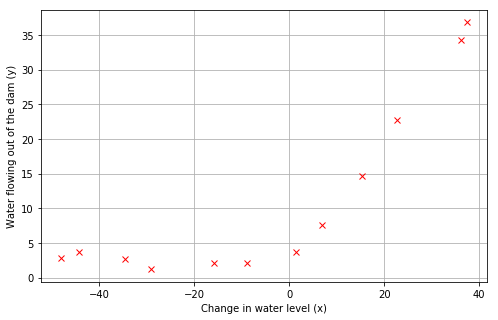

In [5]:
plot_data(X_train, y_train)

In [6]:
def linearRegCostFunction(theta, X, y, reg):
    m = y.size
    h = X.dot(theta)
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    return(J)

In [7]:
initial_theta = np.ones((2,1))
cost = linearRegCostFunction(initial_theta, X_train, y_train, 0)

print(cost)

303.9515255535976


In [9]:
def gradientLinearRegCostFunction(theta, X, y, reg):
    m = y.size
    h = X.dot(theta.reshape(-1,1))
    grad = (1/m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]  
    return(grad.flatten())

In [10]:
gradient = gradientLinearRegCostFunction(initial_theta, X_train, y_train, 0)
print(gradient)

[-15.30301567 598.16741084]


In [11]:
def optimizeTheta(theta, X, y, regularization):
    fit_theta = scipy.optimize.fmin_cg(linearRegCostFunction, x0=theta,
                                       fprime=gradientLinearRegCostFunction,
                                       args=(X, y, regularization),
                                       disp=True,
                                       epsilon=1.49e-12,
                                       maxiter=5000)
    fit_theta = fit_theta.reshape((theta.shape[0],1))
    return(fit_theta)

In [16]:
fit_theta = optimizeTheta(initial_theta, X_train, y_train, 0.)

         Current function value: 1597.218092
         Iterations: 2
         Function evaluations: 103
         Gradient evaluations: 91


In [17]:
def optimize_new(theta, X, y, reg):
    res = minimize(linearRegCostFunction, 
                   theta, 
                   args=(X, y, reg), 
                   method=None, 
                   jac=gradientLinearRegCostFunction, 
                   options={'maxiter':5000})
    return(res)

In [18]:
optimize_new(initial_theta, X_train, y_train, 0.)

      fun: 1285.0884851841524
 hess_inv: array([[1.02731204, 0.00634135],
       [0.00634135, 0.00120857]])
      jac: array([ -3.6472391, -92.1177481])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 102
      nit: 3
     njev: 90
   status: 2
  success: False
        x: array([8.75688344, 0.2333203 ])